In [ ]:
#This  code explores the NBA players from 2013-2014 basketball season
#Uses kMeans clustering algorithm to group them together
#This will show which players are similar

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving nba_2013.csv to nba_2013.csv


In [ ]:
nba=pd.read_csv('nba_2013.csv')
print(nba.head(7))

              Name Position  Height  Weight  Age
0     DeQuan Jones    Guard      80     221   23
1    Darius Miller    Guard      80     235   23
2     Trevor Ariza    Guard      80     210   28
3      James Jones    Guard      80     215   32
4   Wesley Johnson    Guard      79     215   26
5    Klay Thompson    Guard      79     205   23
6  Thabo Sefolosha    Guard      79     215   29


In [ ]:
#Get the number of rows and columns
nba.shape

(505, 5)

In [ ]:
nba.mean()

Height     79.065347
Weight    220.673267
Age        26.190099
dtype: float64

In [ ]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=5, random_state=1)
good_columns=nba._get_numeric_data().dropna(axis=1) #Get numeric data and drop columns with missing daata
kmeans_model.fit(good_columns)
labels=kmeans_model.labels_ #Get the labes or (cluster label for each player)

In [ ]:
labels

array([2, 0, 1, 2, 2, 1, 2, 2, 3, 1, 0, 1, 1, 1, 1, 2, 3, 0, 1, 1, 1, 1,
       1, 3, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3,
       2, 3, 1, 1, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 3, 3, 3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       4, 4, 0, 0, 0, 0, 2, 0, 0, 2, 0, 4, 0, 2, 4, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 4, 0, 2, 2, 0, 2, 0, 0, 4, 0, 1, 0, 0, 0, 4, 2,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 3, 1, 0, 0, 2, 2, 4, 2, 4, 2, 1, 1, 1,
       2, 0, 2, 1, 0, 0, 4, 2, 0, 4, 1, 0, 0, 4, 1,

In [ ]:
#Plot players by cluster
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plot_columns

array([[  0.36678251,  -3.26226832],
       [ 14.28514541,  -3.38397007],
       [-10.47907752,   1.81405217],
       ...,
       [ 24.51314871,   6.40314302],
       [  4.46777938,  -2.38825318],
       [ 14.42913985,   4.58514623]])

<function matplotlib.pyplot.legend>

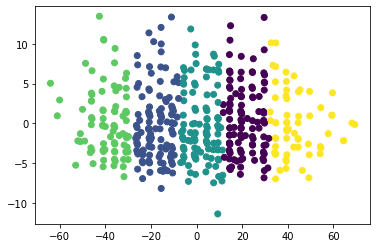

In [ ]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1],c=labels)
plt.legend

In [ ]:
LeBron=good_columns.loc[nba['Name']=='LeBron James',:]
print(LeBron)
Durant=good_columns.loc[nba['Name']=='Kevin Durant',:]
print(Durant)

     Height  Weight  Age
338      80     250   28
     Height  Weight  Age
271      81     230   24


In [ ]:
Lebron_list=LeBron.values.tolist()
Durant_list=Durant.values.tolist()

LeBron_cluster=kmeans_model.predict(Lebron_list)
Durant_cluster=kmeans_model.predict(Durant_list)

In [ ]:
print(LeBron_cluster)
print(Durant_cluster)

[0]
[2]


In [ ]:
nba.corr()

,Height,Weight,Age
Height,1.000000,0.820719,0.005010
Weight,0.820719,1.000000,0.109814
Age,0.005010,0.109814,1.000000
